# Chapter: Support Vector Machines & Kernel Methods


# Topic: PLS model with polymer pilot plant data

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data
data = np.loadtxt('polymer.dat')
X = data[:,0:10]
Y = data[:,10:]
y = Y[:,2:3]

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

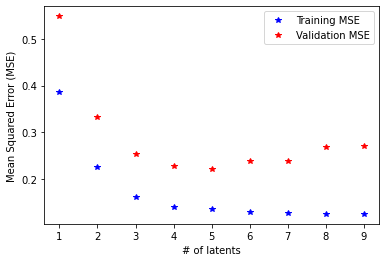

In [7]:
# Finding # latents using kFold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

fit_MSE = []
validate_MSE = []
for n_comp in range(1,10):
    local_fit_MSE = []
    local_validate_MSE = []
    
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
    for fit_index, validate_index in kfold.split(y):
        X_fit_scaled = scaler.fit_transform(X[fit_index])
        X_validate_scaled = scaler.transform(X[validate_index])
        
        y_fit_scaled = scaler.fit_transform(y[fit_index])
        y_validate_scaled = scaler.transform(y[validate_index])
        
        pls = PLSRegression(n_components = n_comp)
        pls.fit(X_fit_scaled, y_fit_scaled)
        
        local_fit_MSE.append(mean_squared_error(y_fit_scaled, pls.predict(X_fit_scaled)))
        local_validate_MSE.append(mean_squared_error(y_validate_scaled, 
                                                        pls.predict(X_validate_scaled)))
    
    fit_MSE.append(np.mean(local_fit_MSE))
    validate_MSE.append(np.mean(local_validate_MSE))


# plot
plt.figure()
plt.plot(range(1,10), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,10), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,10))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()
plt.show()

In [8]:
# build PLS model and predict
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components = 5)
pls.fit(X_scaled, y_scaled)

y_predicted_PLS = y_scaler.inverse_transform(pls.predict(X_scaled))

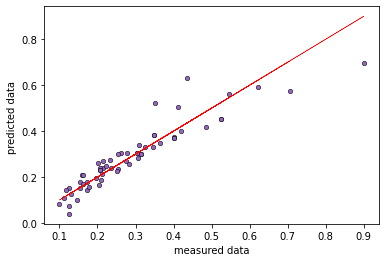

In [9]:
# plots of raw and predicted data
plt.figure()
plt.plot(y, y_predicted_PLS, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9, markerfacecolor = 'C4')
plt.plot(y, y, '-r', linewidth=0.5)
plt.xlabel('measured data')
plt.ylabel('predicted data ')
plt.show()

In [10]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y, y_predicted_PLS))

R2: 0.8593214241285132
